In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew #for some statistics

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings('ignore')

In [46]:
df_schools = pd.read_csv("Masterlist of Schools.csv", index_col="school.id")

df_location = pd.read_csv("Schools Location Data.csv", 
                          encoding = "latin-1", 
                          index_col="School ID",
                          usecols=["School ID", "Enrolment", "Latitude", "Longitude"])

df_rooms = pd.read_csv('Rooms data.csv', index_col="School ID")

df_teachers = pd.read_csv("Teachers data.csv", index_col="school.id")

df_elementary = pd.read_csv("Enrollment Master Data_2015_E.csv")[:-1].astype(int).set_index("School ID")

df_secondary = (pd.read_csv('Enrollment Master Data_2015_S.csv')[:-1]
                  .replace(",", "", regex=True)
                  .astype(int)
                  .rename(columns = {'SPED NG Male':'SPED NG Male SS', 'SPED NG Female' :'SPED NG Female SS'})
                  .set_index("School ID"))

df_mooe = (pd.read_csv('MOOE data.csv', index_col="school.id", usecols=["school.id", " school.mooe "])
             .replace(",", "", regex=True).astype(float))

In [47]:
df_all = pd.concat([df_schools, df_location, df_rooms, df_teachers, df_elementary, df_secondary, df_mooe], axis=1)
df_all

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,school.abbrev,school.previousname,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,Enrolment,Latitude,Longitude,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male SS,SPED NG Female SS,school.mooe
100001,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,Apaleng-Libtong PS,100001.0,-,1/1/1996,Elementary,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 35 M or more but less than P 45 M,NaN,Partially Urban,90.0,18.253666,120.606180,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0,7.0,7.0,2.0,7.0,7.0,9.0,5.0,7.0,5.0,3.0,2.0,14.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84000.0
100002,Bacarra CES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100002.0,Santa Rita,1/1/1914,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,456.0,18.250964,120.608958,12.0,0.0,0.0,0.0,0.0,6.0,11.0,0.0,41.0,25.0,38.0,33.0,41.0,40.0,28.0,31.0,38.0,30.0,26.0,31.0,22.0,32.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268000.0
100003,Buyon ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100003.0,NONE,1/1/1947,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,167.0,18.234599,120.616037,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,10.0,13.0,15.0,13.0,13.0,16.0,16.0,14.0,11.0,9.0,12.0,12.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135000.0
100004,Ganagan ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,NaN,100004.0,NONE,1/1/1949,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,122.0,18.250014,120.587169,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,4.0,9.0,12.0,12.0,10.0,10.0,5.0,14.0,11.0,5.0,7.0,10.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116000.0
100005,Macupit ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100005.0,Macupit,1/1/1913,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,77.0,18.293994,120.641019,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,4.0,2.0,5.0,7.0,4.0,6.0,3.0,8.0,11.0,5.0,7.0,4.0,3.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326101,Upper Katungal National High School-TNHS Annex,Region XII,Soccsksargen,SULTAN KUDARAT,SULTAN KUDARAT,Tacurong City,CITY OF TACURONG,Tacurong South,1st District,Annex or Extension school(s),UKNHS-TNHS Annex,Tacurong NHS - Upper Katungal Annex,304624.0,Upper Katungal,1/1/2011,Secondary,DepED Managed,Secondary,Monograde,P 160 M or more but less than P 240 M

In [45]:
df_secondary = (pd.read_csv('Enrollment Master Data_2015_S.csv')[:-1]
                  .replace(",", "", regex=True)
                  .astype(int)
                  .rename(columns = {'SPED NG Male':'SPED NG Male SS', 'SPED NG Female' :'SPED NG Female SS'})
                  .set_index("School ID"))

df_secondary

,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male SS,SPED NG Female SS
School ID,,,,,,,,,,,,,,
300001,20,12,13,17,10,15,17,14,0,0,0,0,0,0
300002,240,288,229,258,225,231,261,207,0,0,0,0,0,0
300003,89,84,78,88,65,76,54,79,0,0,0,0,0,0
300004,38,47,47,54,39,42,52,45,0,0,0,0,0,0
300005,78,70,60,61,68,64,53,50,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320607,49,39,46,44,48,46,42,50,0,0,0,0,0,0
320701,406,368,367,354,351,333,298,328,0,0,0,0,0,0
320702,252,245,215,202,164,185,140,126,0,0,0,0,0,0


In [8]:
df_all.isna().sum()

school.name                     148
school.region                   148
school.region.name              148
school.province                 148
school.cityhall                 149
school.division                 148
school.citymuni                 148
school.district                 148
school.legdistrict              148
school.type                     148
school.abbrev                 28584
school.previousname            4530
school.mother.id                155
school.address                 2130
school.established              157
school.classification           148
school.classification2          148
school.curricularclass          148
school.organization             148
school.cityincome              1124
school.cityclass              38538
school.urban                    151
Enrolment                       127
Latitude                        130
Longitude                       130
rooms.standard.academic         339
rooms.standard.unused           339
rooms.nonstandard.academic  

In [10]:
df_all[df_all.index.duplicated(keep=False)]

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,school.abbrev,school.previousname,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,Enrolment,Latitude,Longitude,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male,SPED NG Female,school.mooe


In [49]:
df_all.columns

Index(['school.name', 'school.region', 'school.region.name', 'school.province',
       'school.cityhall', 'school.division', 'school.citymuni',
       'school.district', 'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'Enrolment', 'Latitude',
       'Longitude', 'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped', 'Kinder Male', 'Kinder Female', 'Grade 1 Male',
       'Grade 1 Female', 'Grade 2 Male', 'Grade 2 Female', 'Grade 3 Male',
       'Grade 3 Female', 'Grade 4 Male', 'Grade 4 Female', 'Grade 5 Male',
       'Grade 5 Female', 'Grade 6 Male', 'Grade 6 Femal

In [60]:
df_all['Total Elementary SPED Students'] = df_all['SPED NG Male'] + df_all['SPED NG Female']
df_all['Total Secondary SPED Students'] = df_all['SPED NG Male SS'] + df_all['SPED NG Female SS']
df_all['Total Rooms'] = (df_all['rooms.standard.academic'] + 
                             df_all['rooms.standard.unused'] + 
                             df_all['rooms.nonstandard.academic'] + 
                             df_all['rooms.nonstandard.unused'])
df_all['Other Teachers'] = (df_all['teachers.instructor'] + 
                             df_all['teachers.mobile'] + 
                             df_all['teachers.regular'])
                            
df_all['SPED Teachers'] = df_all['teachers.sped']

In [61]:
df_all.isna().sum()

school.name                         148
school.region                       148
school.region.name                  148
school.province                     148
school.cityhall                     149
school.division                     148
school.citymuni                     148
school.district                     148
school.legdistrict                  148
school.type                         148
school.abbrev                     28584
school.previousname                4530
school.mother.id                    155
school.address                     2130
school.established                  157
school.classification               148
school.classification2              148
school.curricularclass              148
school.organization                 148
school.cityincome                  1124
school.cityclass                  38538
school.urban                        151
Enrolment                           127
Latitude                            130
Longitude                           130


In [66]:
df_eda = df_all[['school.classification','school.classification2','school.type','school.urban','Total Elementary SPED Students','Total Secondary SPED Students','Total Rooms','Other Teachers','SPED Teachers',' school.mooe ']]

<AxesSubplot:>

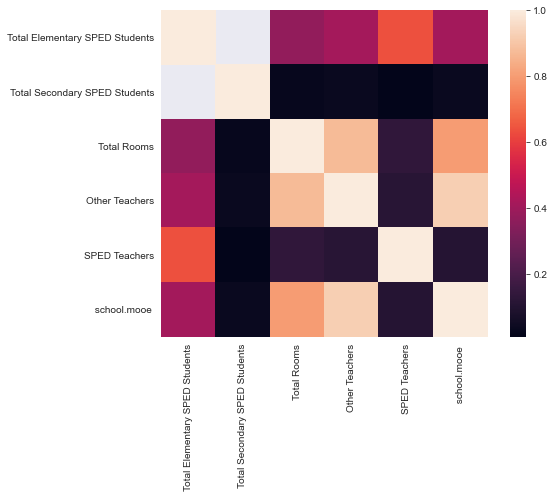

In [67]:
corrmat_eda = df_eda.corr()
f, ax = plt.subplots(figsize = (8,6))
sns.heatmap(corrmat_eda, square = True)

The plot shows that: 
<br> 1.) There are more ***SPED Teachers*** in the **Elementary Grade** rather in the **Secondary Grade**.
<br> 2.) ***Other Teachers*** (Regular, Mobile, & Instructor) take much more of the room allocation rather than the *SPED Teachers*. This makes sense because the number of total enrolees for regular students is higher than SPED students.
<br> 3.) The number of ***total rooms*** is highly correlated with the ***school's budget***. This highly suggests that the higher the budget, the higher number of rooms a school can construct/offer.
<br> 4.) Also, a ***school's budget*** has something to do with their capability to hire/have more teachers. Based on the plot, it suggests that the higher the budget of a school, the greater the number of teachers they can deploy.

In [69]:
df_eda_missing = (df_eda.isnull().sum() / len(df_eda))*100
df_eda_missing = df_eda_missing.drop(df_eda_missing[df_eda_missing == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Percentage':df_eda_missing})
missing_data

,Missing Percentage
Total Secondary SPED Students,82.939402
Total Elementary SPED Students,17.332250
school.mooe,5.824474
Other Teachers,3.659815
SPED Teachers,3.659815
Total Rooms,0.733674
school.urban,0.322988
school.classification,0.316571
school.classification2,0.316571
school.type,0.316571


In [83]:
df_eda.isna().sum()

school.classification               148
school.classification2              148
school.type                         148
school.urban                        151
Total Elementary SPED Students     8103
Total Secondary SPED Students     38775
Total Rooms                         343
Other Teachers                     1711
SPED Teachers                      1711
 school.mooe                       2723
dtype: int64

In [77]:
df_all.shape

(46751, 70)

In [92]:
df_eda_copy = df_eda
df_eda_copy['Total Elementary SPED Students'] = df_eda_copy['Total Elementary SPED Students'].fillna(0)
df_eda_copy['Total Secondary SPED Students'] = df_eda_copy['Total Elementary SPED Students'].fillna(0)
df_eda_copy


,school.classification,school.classification2,school.type,school.urban,Total Elementary SPED Students,Total Secondary SPED Students,Total Rooms,Other Teachers,SPED Teachers,school.mooe
100001,Elementary,DepED Managed,School with no Annexes,Partially Urban,0.0,0.0,2.0,2.0,0.0,84000.0
100002,Elementary,DepED Managed,School with no Annexes,Partially Urban,0.0,0.0,12.0,17.0,0.0,268000.0
100003,Elementary,DepED Managed,School with no Annexes,Partially Urban,0.0,0.0,6.0,7.0,0.0,135000.0
100004,Elementary,DepED Managed,School with no Annexes,Partially Urban,0.0,0.0,6.0,7.0,0.0,116000.0
100005,Elementary,DepED Managed,School with no Annexes,Partially Urban,0.0,0.0,6.0,7.0,0.0,115000.0
...,...,...,...,...,...,...,...,...,...,...
326101,Secondary,DepED Managed,Annex or Extension school(s),Partially Urban,0.0,0.0,2.0,NaN,NaN,174000.0
326102,Secondary,DepED Managed,Annex or Extension school(s),Partially Urban,0.0,0.0,2.0,NaN,NaN,144000.0
326501,Secondary,DepED Managed,School with no Annexes,Partially Urban,0.0,0.0,NaN,0.0,0.0,NaN
356059,Secondary,DepED Managed,Annex or Extension school(s),Partially Urban,0.0,0.0,3.0,NaN,NaN,177000.0


In [100]:
df_eda_missing = (df_eda_copy.isnull().sum() / len(df_eda_copy))*100
df_eda_missing = df_eda_missing.drop(df_eda_missing[df_eda_missing == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Percentage':df_eda_missing})
missing_data

,Missing Percentage
school.mooe,5.824474
Other Teachers,3.659815
SPED Teachers,3.659815
Total Rooms,0.733674
school.urban,0.322988
school.classification,0.316571
school.classification2,0.316571
school.type,0.316571


<AxesSubplot:>

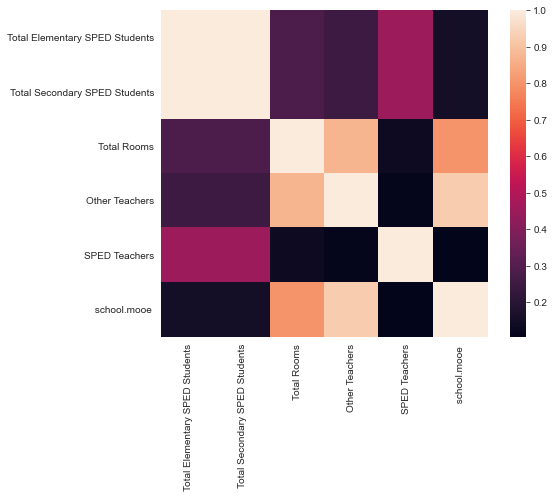

In [94]:
corrmat_eda = df_eda_copy.corr()
f, ax = plt.subplots(figsize = (8,6))
sns.heatmap(corrmat_eda, square = True)

The plot shows that: 
<br> 1.) There are more ***SPED Teachers*** in the **Elementary Grade** rather in the **Secondary Grade**.
<br> 2.) ***Other Teachers*** (Regular, Mobile, & Instructor) take much more of the room allocation rather than the *SPED Teachers*. This makes sense because the number of total enrolees for regular students is higher than SPED students.
<br> 3.) The number of ***total rooms*** is highly correlated with the ***school's budget***. This highly suggests that the higher the budget, the higher number of rooms a school can construct/offer.
<br> 4.) Also, a ***school's budget*** has something to do with their capability to hire/have more teachers. Based on the plot, it suggests that the higher the budget of a school, the greater the number of teachers they can deploy.

In [102]:
df_eda_clean = df_eda_copy.dropna()
df_eda_clean.shape

(42339, 10)

In [103]:
df_eda_missing = (df_eda_clean.isnull().sum() / len(df_eda_clean))*100
df_eda_missing = df_eda_missing.drop(df_eda_missing[df_eda_missing == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Percentage':df_eda_missing})
missing_data

,Missing Percentage


In [107]:
df_eda_clean.columns

Index(['school.classification', 'school.classification2', 'school.type',
       'school.urban', 'Total Elementary SPED Students',
       'Total Secondary SPED Students', 'Total Rooms', 'Other Teachers',
       'SPED Teachers', ' school.mooe '],
      dtype='object')

In [108]:
df_eda_clean['school.urban'].value_counts()

Partially Urban    36758
Urban               3588
Rural               1993
Name: school.urban, dtype: int64

In [111]:
# Scatterplot all Features
cat_col = ['school.classification', 'school.classification2', 'school.type',
       'school.urban']
for col in cat_col:
    sns.set()
    cols = ['Total Elementary SPED Students', 'Total Secondary SPED Students', 'Total Rooms', 'Other Teachers',
       'SPED Teachers', ' school.mooe ']
    plt.figure()
    sns.pairplot(df_eda_clean, size = 4.0, hue = ['school.classification'])
    plt.show

KeyError: ('Total Elementary SPED Students', 'Total Secondary SPED Students', 'Total Rooms', 'Other Teachers', 'SPED Teachers', ' school.mooe ')

<Figure size 432x288 with 0 Axes>

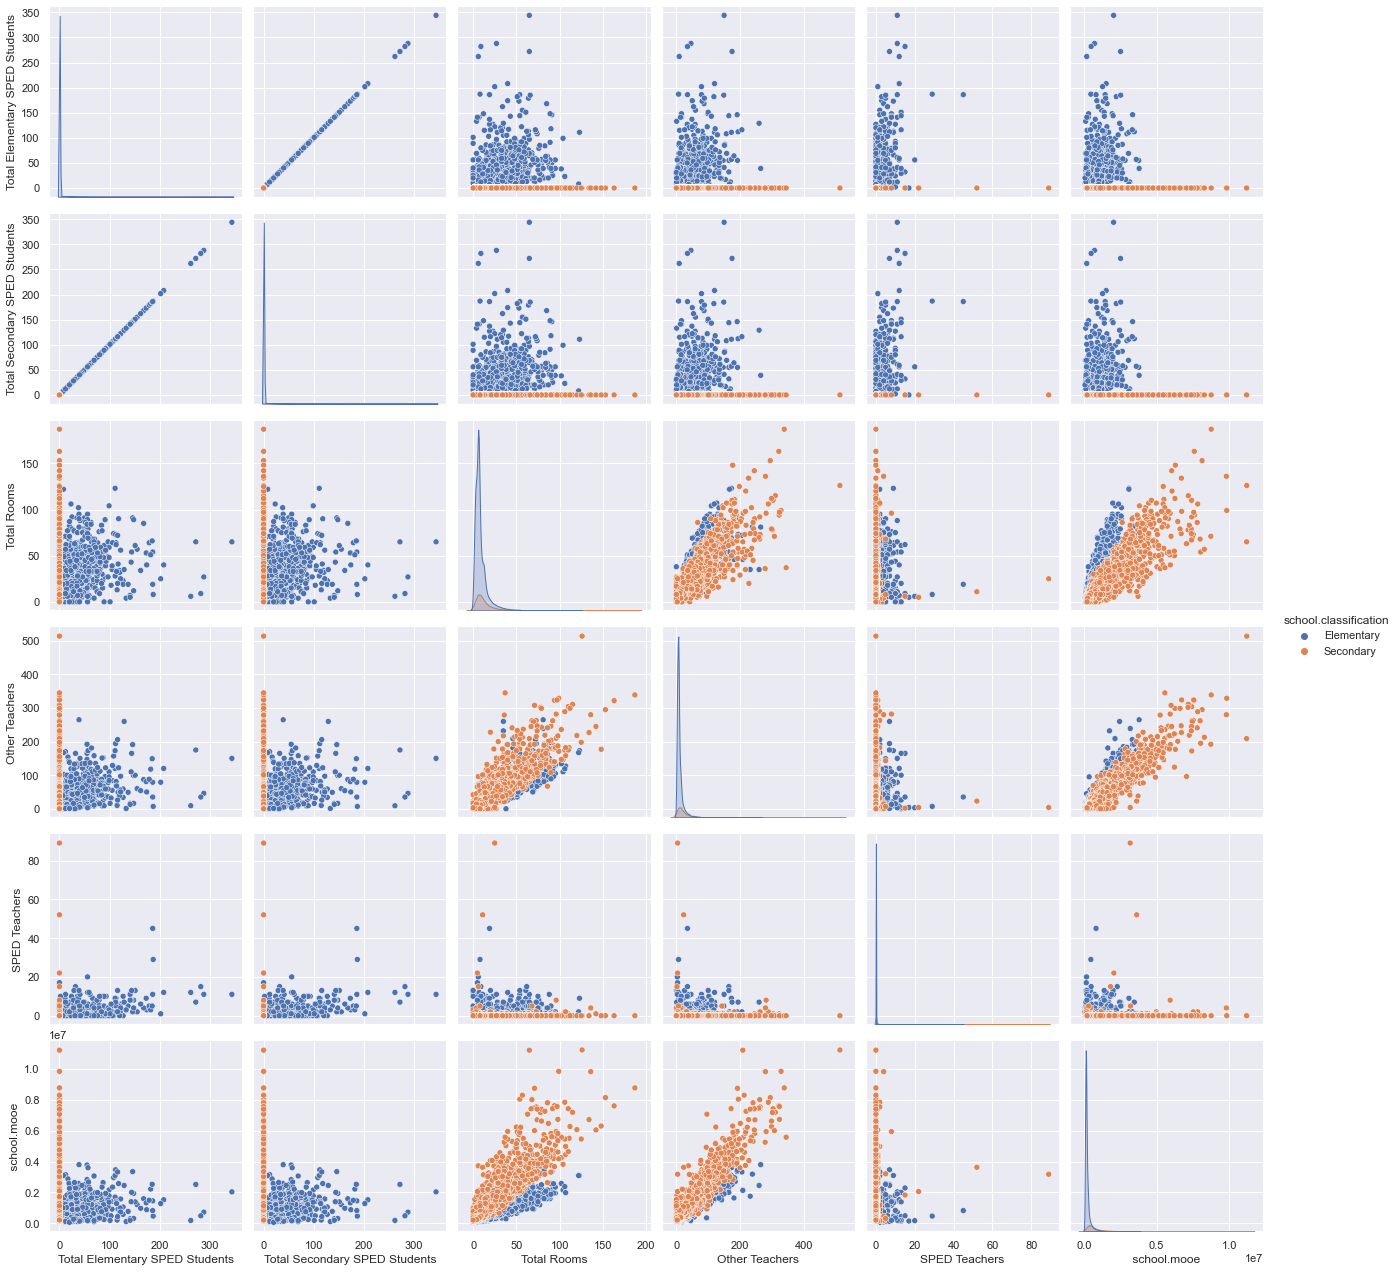

In [119]:
sns.pairplot(df_eda_clean, size = 3.0, hue = 'school.classification')